Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

Loading Dataset

In [47]:
df=pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y
3,LP001006,Male,Yes,2583,120.0,Y
4,LP001008,Male,No,6000,141.0,Y


In [48]:
df.shape

(598, 6)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


In [50]:
df.describe()

,ApplicantIncome,LoanAmount
count,598.000000,577.000000
mean,5292.252508,144.968804
std,5807.265364,82.704182
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3806.000000,127.000000
75%,5746.000000,167.000000
max,81000.000000,650.000000


In [51]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
ApplicantIncome,0
LoanAmount,21
Loan_Status,0


Exploratory Data Analysis

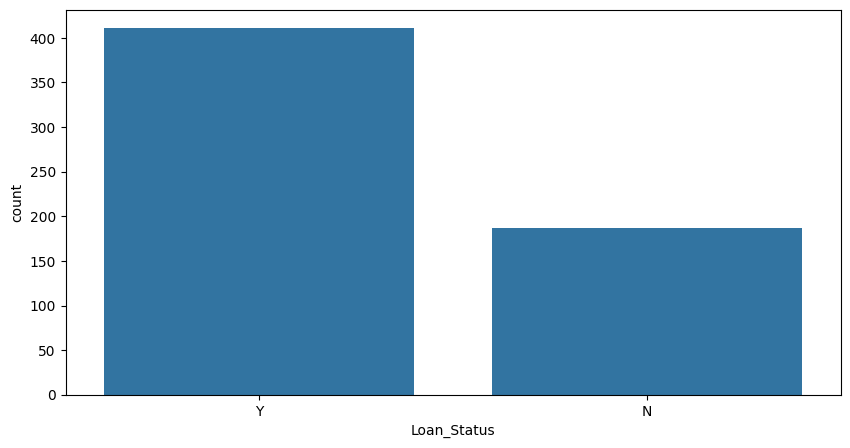

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',data=df)
plt.show()

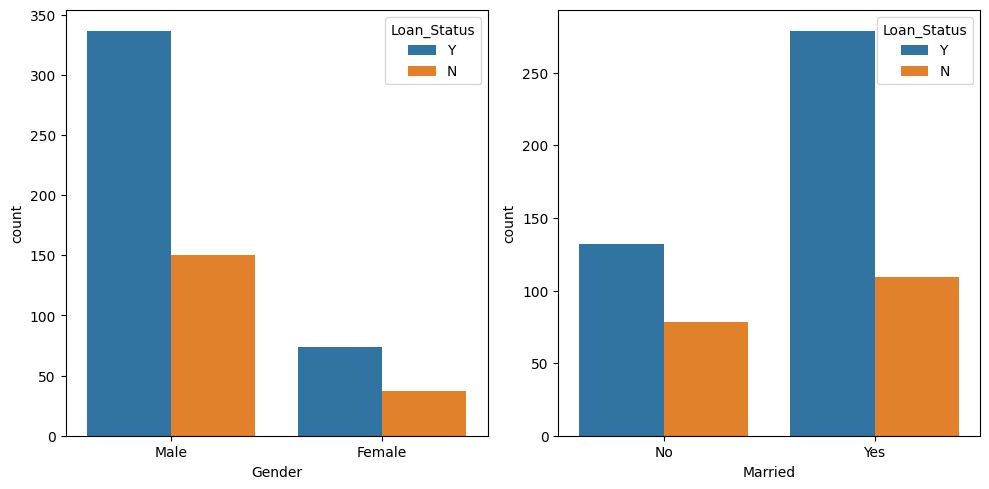

In [53]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['Gender', 'Married']):
  plt.subplot(1, 2, i+1)
  sns.countplot(x=col, hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

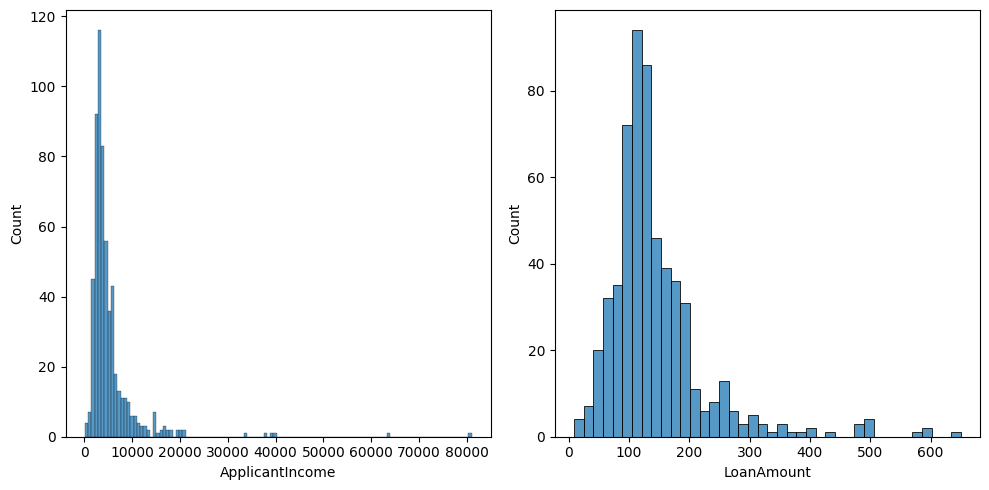

In [54]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
  plt.subplot(1, 2, i+1)
  sns.histplot(x=df[col])
plt.tight_layout()
plt.show()

In [55]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

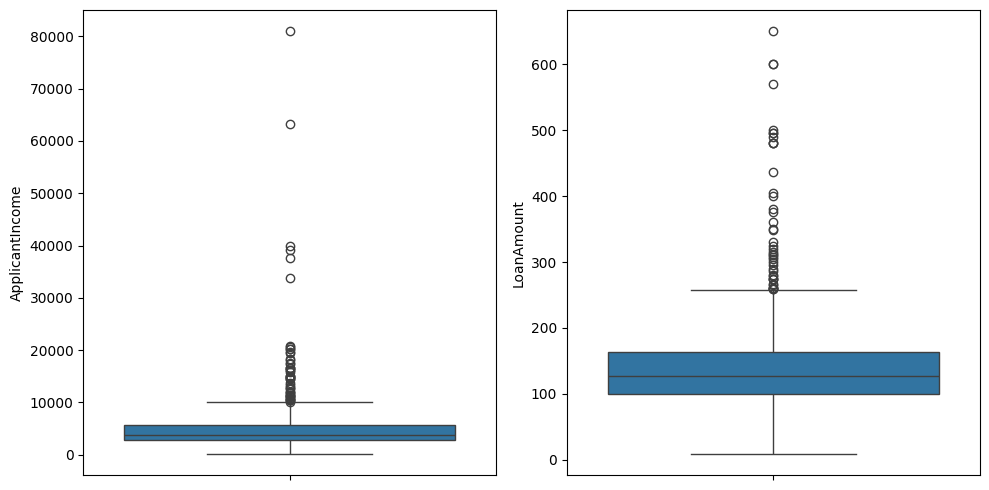

In [56]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
  plt.subplot(1, 2, i+1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [58]:
df=df[df['ApplicantIncome']<25000]
df=df[df['LoanAmount']<400000]

In [60]:
df.shape

(592, 6)

In [64]:
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']

,LoanAmount
Gender,
Female,126.702703
Male,146.087318


In [66]:
df.groupby(['Gender', 'Married']).mean(numeric_only=True)['LoanAmount']

Gender  Married
Female  No         116.387500
        Yes        153.322581
Male    No         135.612403
        Yes        149.926136
Name: LoanAmount, dtype: float64

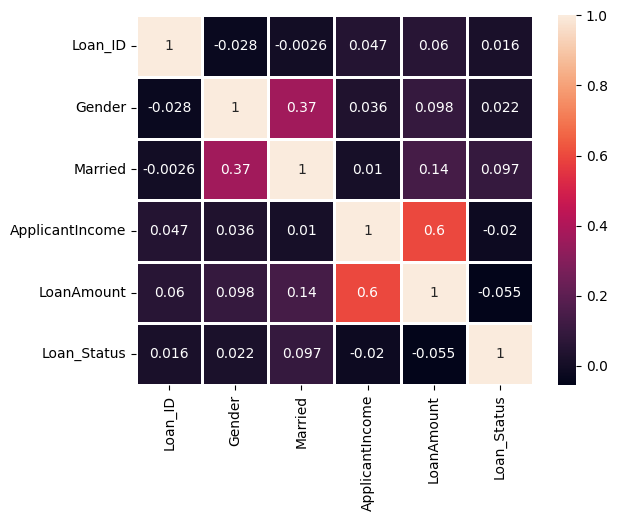

In [67]:
label_encoder=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=label_encoder.fit_transform(df[col])

sns.heatmap(df.corr(), annot=True, linewidths=1)
plt.show()

In [68]:
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,0,1,0,5849,127.0,1
1,1,1,1,4583,128.0,0
2,2,1,1,3000,66.0,1
3,3,1,1,2583,120.0,1
4,4,1,0,6000,141.0,1


Data Processing

In [69]:
feature=df.drop('Loan_Status', axis=1)
target=df['Loan_Status']

X_train, X_test, y_train, y_test=train_test_split(feature, target, test_size=0.2, random_state=10)

ros=RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train, y_train=ros.fit_resample(X_train, y_train)

In [71]:
X_train.shape, X_test.shape

((662, 5), (119, 5))

In [72]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Model Deployment

In [77]:
svm=SVC(kernel='rbf')
svm.fit(X_train, y_train)
model_pred=svm.predict(X_train)
print('Training Accuracy:', metrics.accuracy_score(y_train, model_pred))
print('Validation Accuracy:', metrics.roc_auc_score(y_test, svm.predict(X_test_scaled)))

Training Accuracy: 0.6238670694864048
Validation Accuracy: 0.5159118727050184


Model Evaluation

In [79]:
training_roc_auc=metrics.accuracy_score(y_train, model_pred)
validation_roc_auc=metrics.roc_auc_score(y_test, svm.predict(X_test_scaled))
print('Training Accuracy:', training_roc_auc)
print('Validation Accuracy:', validation_roc_auc)
cm=metrics.confusion_matrix(y_test, svm.predict(X_test_scaled))

Training Accuracy: 0.6238670694864048
Validation Accuracy: 0.5159118727050184


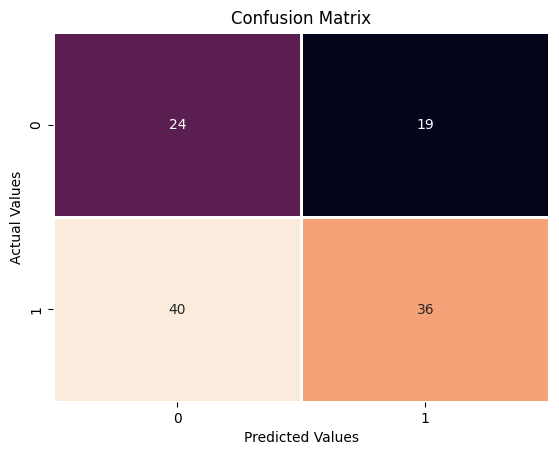

In [85]:
sns.heatmap(cm, annot=True, linewidths=1, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [88]:
print('Classification Report:')
print(metrics.classification_report(y_test, svm.predict(X_test_scaled)))

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.56      0.45        43
           1       0.65      0.47      0.55        76

    accuracy                           0.50       119
   macro avg       0.51      0.52      0.50       119
weighted avg       0.55      0.50      0.51       119

